# Project

TDS3301 - Data Mining

By Ong Shuoh Chwen (1171102212) & Yong Wen Kai (1171101664)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

#### QUESTION 3: Intelligent Decision-Making for Loan Application

First and foremost, we will need to import the `Bank_CS.csv` into the project.

In [7]:
df = pd.read_csv("Bank_CS.csv")
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2.0,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2.0,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2.0,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2.0,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


#### Exploratory Data Analysis and Data Pre-Processing

##### Step 1: Dealing with missing values.

In [16]:
#Duplicate the dataframe first
df1 = df.copy()

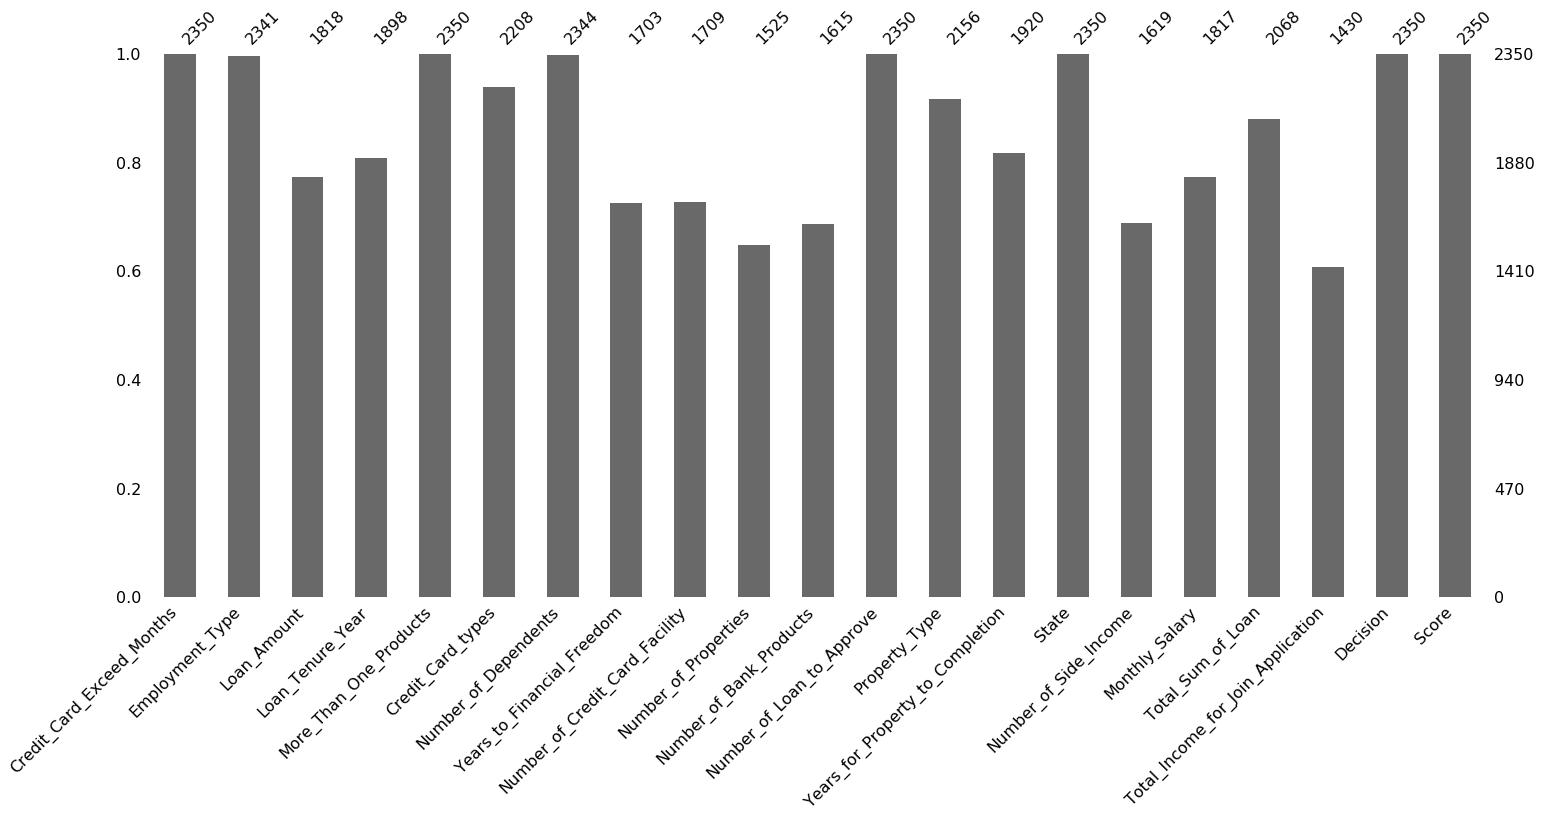

In [17]:
#check missing values
df1.isnull().sum()
msno.bar(df1)

The bar chart above shows that not all values are the same, so in order to proceed, we will need to fill those missing values with mode
`(the highest value among all other values)`.

In [18]:
#Fill all missing values with mode
for column in df1.columns:
    df1[column].fillna(df1[column].mode()[0], inplace=True)

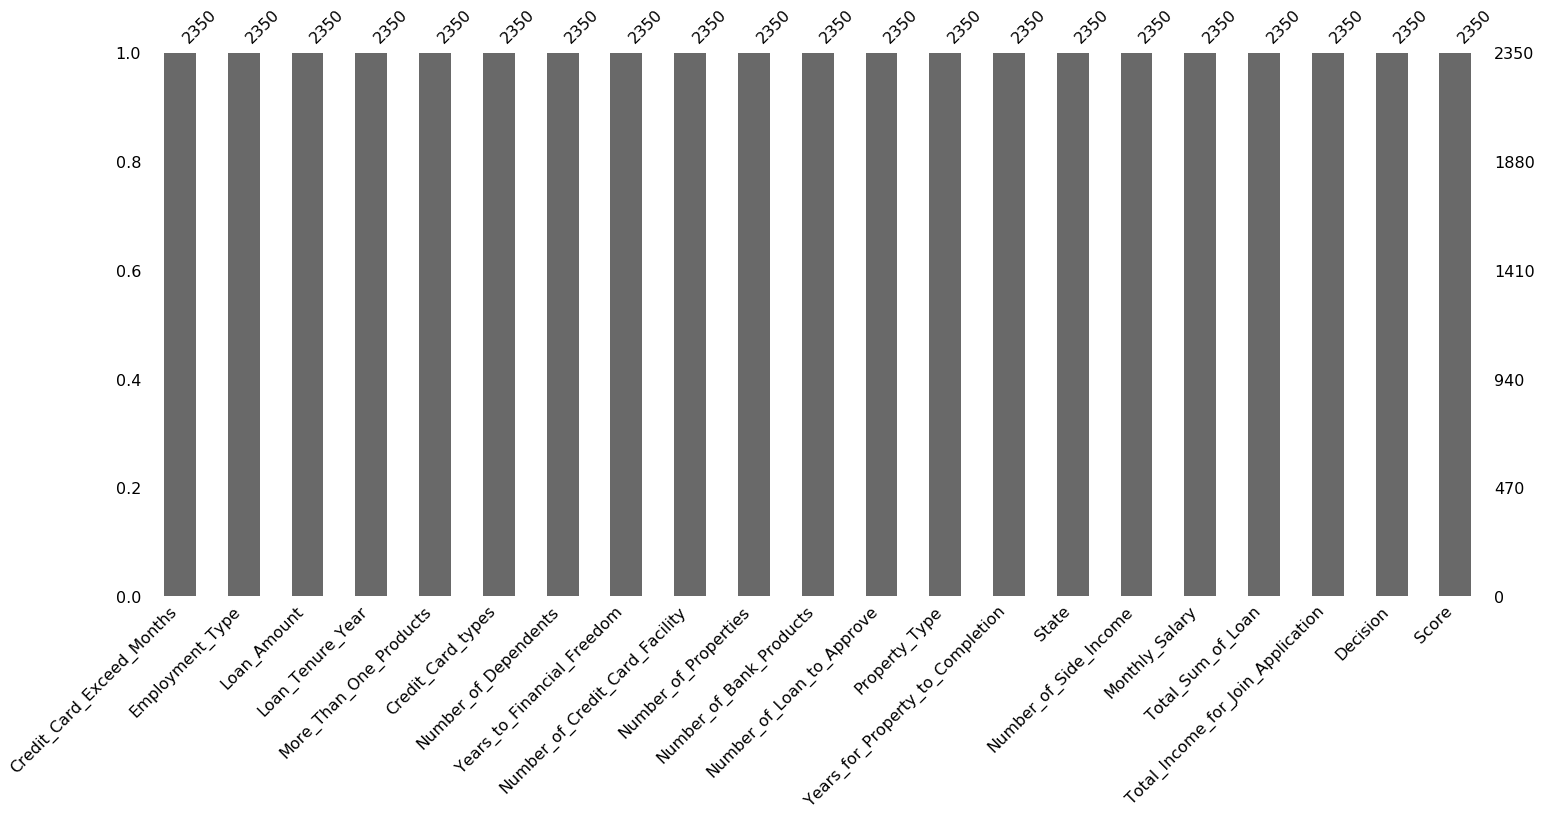

In [19]:
#check missing values again
df1.isnull().sum()
msno.bar(df1)

##### Step 2: Dealing With Noisy Data.

##### Step 2: Handling Highly Correlated Features.

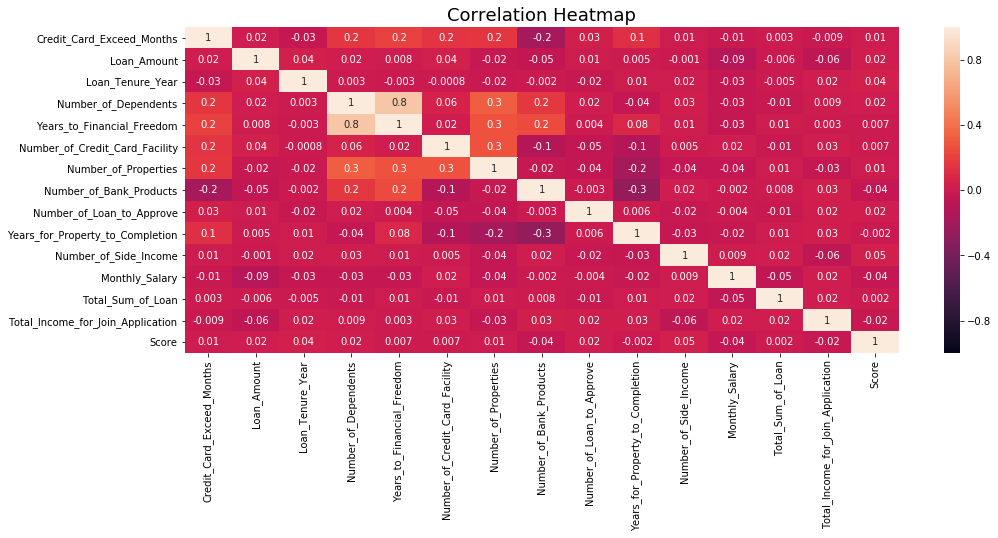

In [3]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, fmt='.1g')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18});

Based on the Correlation Heatmap above, no correlated values are higher than 99%.

##### Step 3: Handling Low-Variance Features.

In [4]:
df1.var()

Credit_Card_Exceed_Months            4.414735e+00
Loan_Amount                          4.095150e+10
Loan_Tenure_Year                     1.884078e+01
Number_of_Dependents                 1.986365e+00
Years_to_Financial_Freedom           1.666876e+01
Number_of_Credit_Card_Facility       1.892878e+00
Number_of_Properties                 6.616514e-01
Number_of_Bank_Products              2.364637e+00
Number_of_Loan_to_Approve            6.670270e-01
Years_for_Property_to_Completion     1.150530e+00
Number_of_Side_Income                6.726374e-01
Monthly_Salary                       6.786466e+06
Total_Sum_of_Loan                    8.596682e+10
Total_Income_for_Join_Application    1.317901e+07
Score                                1.237749e+00
dtype: float64

Since we have many features to take into consideration, we decided to remove `Years_for_Property_to_Completion` because the variance value is the lowest among all other features.

In [4]:
df2 = df1.drop(columns=['Years_for_Property_to_Completion'])
df2.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2.0,5.0,2.0,2.0,1.0,1,condominium,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2.0,NaN,2.0,2.0,1.0,2,NaN,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2.0,5.0,2.0,2.0,NaN,3,condominium,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2.0,5.0,NaN,2.0,1.0,1,condominium,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,1.0,2,condominium,Johor,3.0,5628.0,774695.0,NaN,Reject,8


##### Step 4: Handling Imbalanced Data

In [8]:
seed = 100
k = 1

pd.read_csv('Bank_CS.csv', encoding='utf-8', engine='python')
X = df2.loc[:, df2.columns != 'label']
y = df2.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df2 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df2.columns = ['feature_1', 'feature_2', 'label']
#df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

AttributeError: 'DataFrame' object has no attribute 'label'